In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load the CSV file
df = pd.read_csv('C:\\Users\\LENOVO\\OneDrive\\Desktop\\Project Resume\\data\\online_advertising_performance_data.csv')

# Preview the dataset
df.head()

# Summary of columns, types, and nulls
df.info()

# Check for nulls
df.isnull().sum()
# Basic stats
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
dtypes: float64(5), int64(4

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13
count,15408,15408.000000,15408,15408,15408,14995,15408.000000,15408.000000,15408.000000,15408.000000,15408.000000,15408.000000,0.0,0.0
unique,3,NaN,3,3,8,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,April,NaN,camp 3,Medium,728 x 90,mno,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6269,NaN,6917,5489,3142,4501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,15.518886,NaN,NaN,NaN,NaN,15512.573014,11.370262,161.788487,17.929943,42.300623,2123.288058,NaN,NaN
std,NaN,8.740909,NaN,NaN,NaN,NaN,44392.392890,45.369499,728.276911,96.781834,213.685660,10523.029607,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,8.000000,NaN,NaN,NaN,NaN,78.000000,0.024000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,15.000000,NaN,NaN,NaN,NaN,1182.000000,0.339850,6.000000,0.483950,0.000000,0.000000,NaN,NaN
75%,NaN,23.000000,NaN,NaN,NaN,NaN,8960.250000,2.536225,53.000000,3.839800,3.000000,163.351200,NaN,NaN


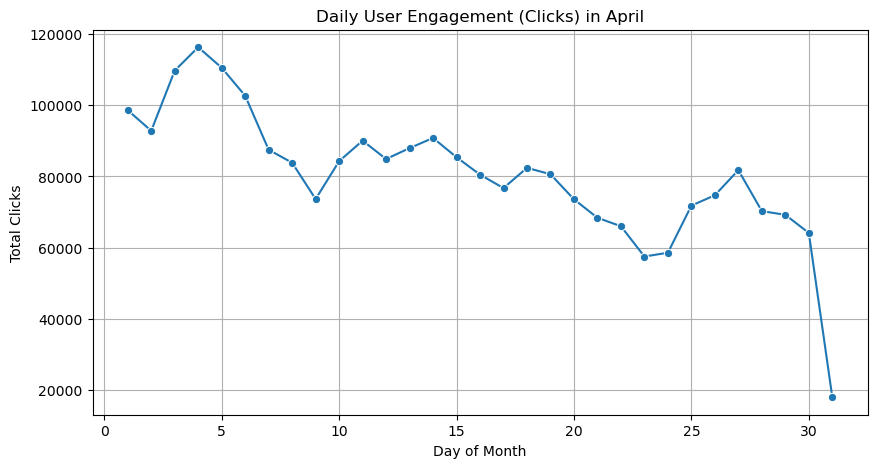

In [2]:
#q1

# Convert 'day' to integer just in case
df['day'] = df['day'].astype(int)

# Aggregate daily engagement (sum of clicks)
daily_engagement = df.groupby('day')['clicks'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=daily_engagement, x='day', y='clicks', marker='o')
plt.title('Daily User Engagement (Clicks) in April')
plt.xlabel('Day of Month')
plt.ylabel('Total Clicks')
plt.grid(True)
plt.show()


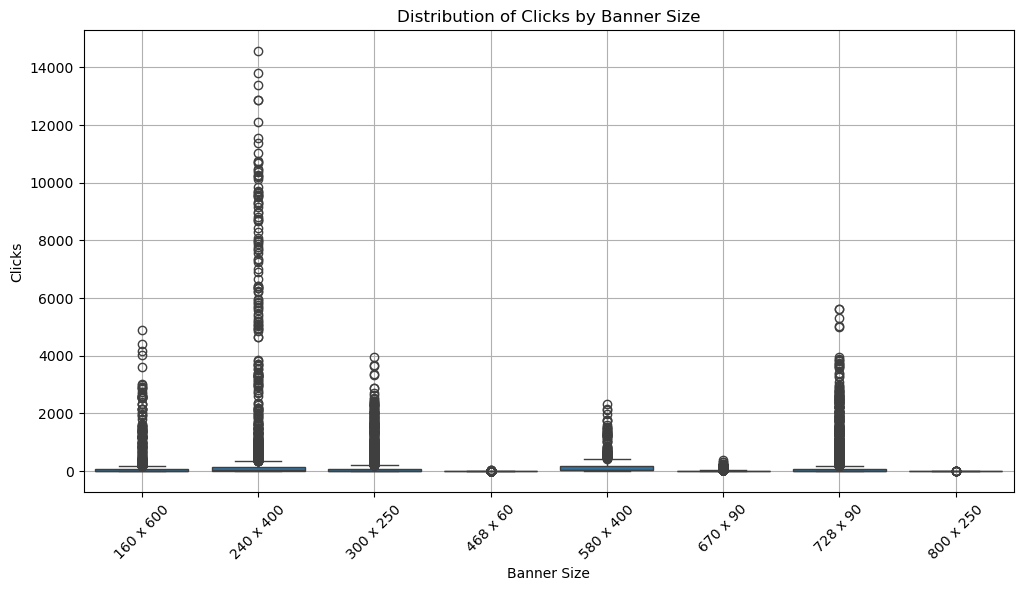

banner
240 x 400    459.074639
580 x 400    199.143564
728 x 90     181.287715
300 x 250    145.820567
160 x 600    132.725762
670 x 90      15.817602
468 x 60       0.681938
800 x 250      0.033426
Name: clicks, dtype: float64


In [3]:
#Q2
# Plot average clicks by banner size
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='banner', y='clicks')
plt.title('Distribution of Clicks by Banner Size')
plt.xlabel('Banner Size')
plt.ylabel('Clicks')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

banner_clicks = df.groupby('banner')['clicks'].mean().sort_values(ascending=False)
print(banner_clicks)

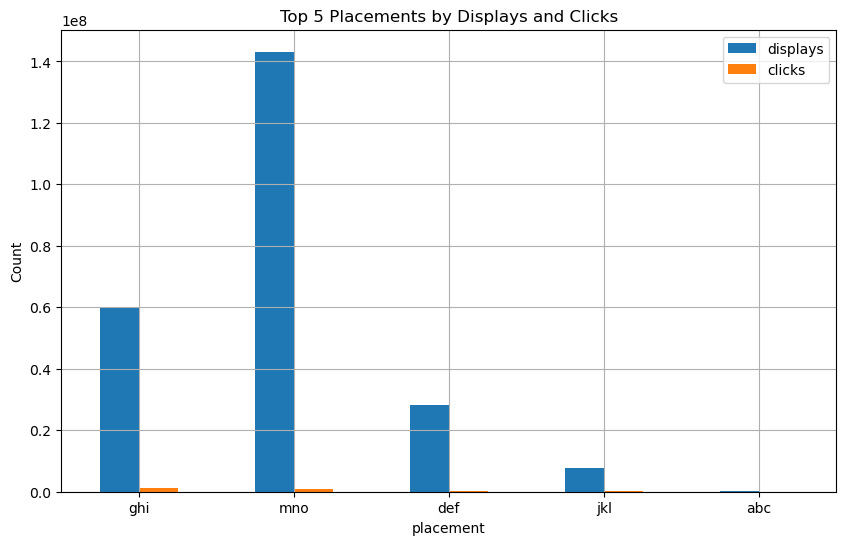

In [4]:
#Q3
# Summarize placements
placement_summary = df.groupby('placement')[['displays', 'clicks']].sum().sort_values(by='clicks', ascending=False)

# Plot top 5
placement_summary.head(5).plot(kind='bar', figsize=(10, 6))
plt.title('Top 5 Placements by Displays and Clicks')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


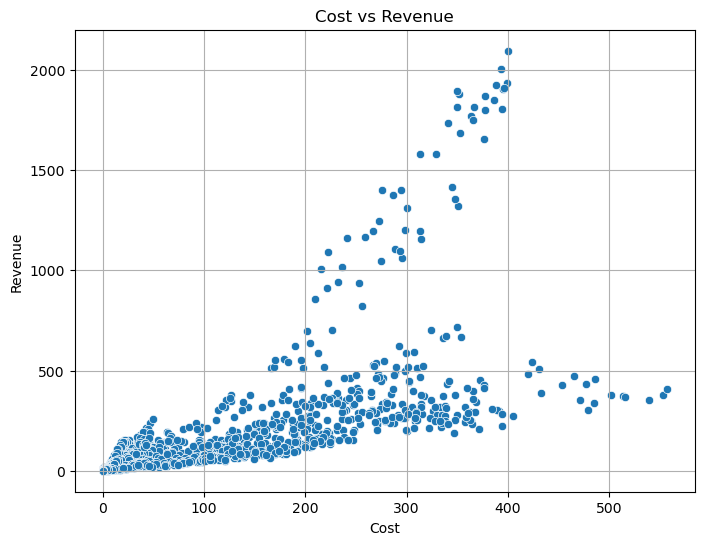

Correlation between cost and revenue: 0.76


In [5]:
#Q4

# Scatter plot: cost vs revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='cost', y='revenue')
plt.title('Cost vs Revenue')
plt.xlabel('Cost')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

# Correlation value
correlation = df['cost'].corr(df['revenue'])
print(f"Correlation between cost and revenue: {correlation:.2f}")


In [6]:
#Q5
total_revenue = df['revenue'].sum()
total_clicks = df['clicks'].sum()

avg_revenue_per_click = total_revenue / total_clicks
print(f"Average revenue per click: ₹{avg_revenue_per_click:.2f}")


Average revenue per click: ₹0.11


campaign_number
camp 1    0.246560
camp 3    0.029531
camp 2    0.015787
Name: conversion_rate, dtype: float64


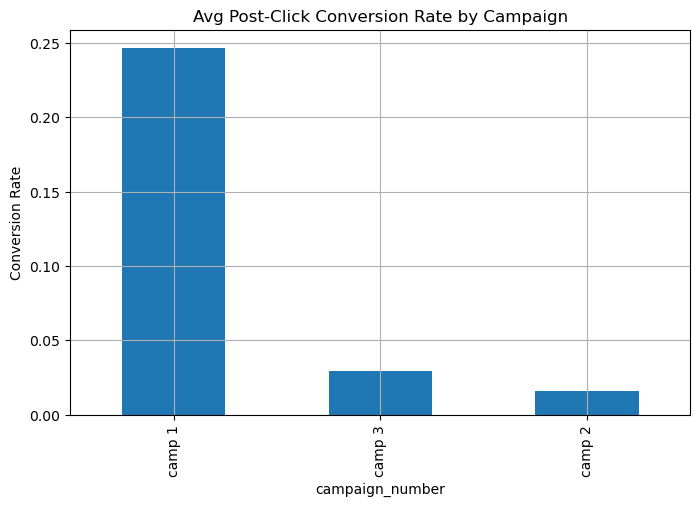

In [7]:
#Q6

df['conversion_rate'] = df.apply(lambda row: row['post_click_conversions'] / row['clicks'] if row['clicks'] > 0 else 0, axis=1)

# Group by campaign and calculate average conversion rate
campaign_conv = df.groupby('campaign_number')['conversion_rate'].mean().sort_values(ascending=False)
print(campaign_conv)

campaign_conv.plot(kind='bar', figsize=(8, 5), title='Avg Post-Click Conversion Rate by Campaign')
plt.ylabel('Conversion Rate')
plt.grid(True)
plt.show()


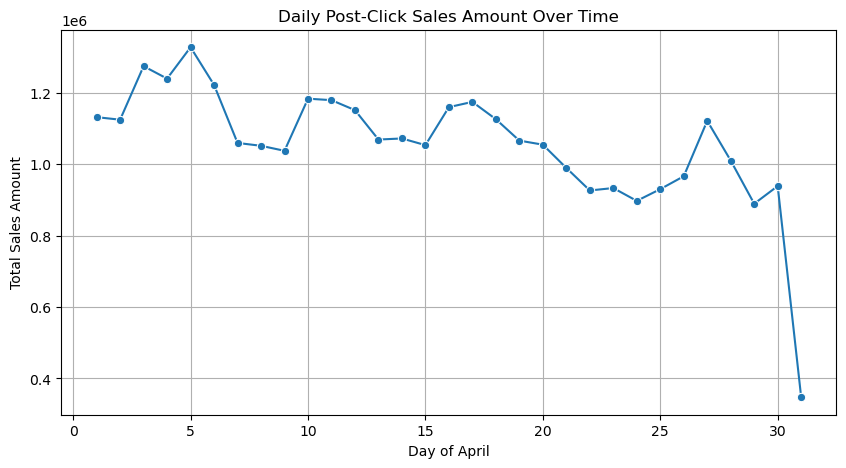

In [8]:
#Q7
daily_sales = df.groupby('day')['post_click_sales_amount'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=daily_sales, x='day', y='post_click_sales_amount', marker='o')
plt.title('Daily Post-Click Sales Amount Over Time')
plt.xlabel('Day of April')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()

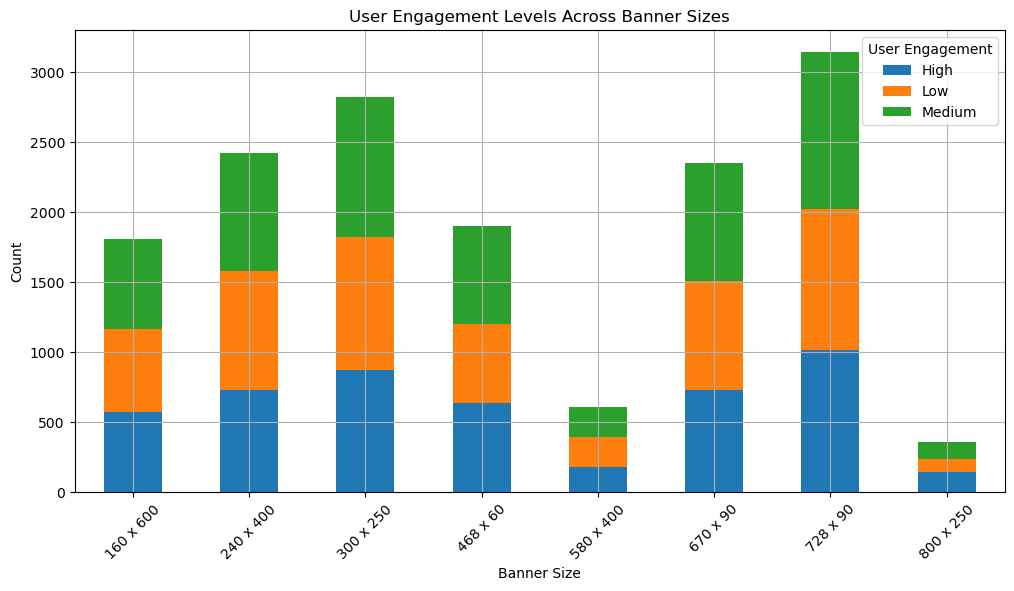

In [9]:
#Q8
# Count of entries by user engagement and banner
engagement_banner = df.groupby(['banner', 'user_engagement']).size().unstack().fillna(0)

# Plot
engagement_banner.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('User Engagement Levels Across Banner Sizes')
plt.xlabel('Banner Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='User Engagement')
plt.grid(True)
plt.show()


placement
mno    0.146651
jkl    0.129367
ghi    0.128403
def    0.124768
abc    0.054280
Name: conversion_rate, dtype: float64


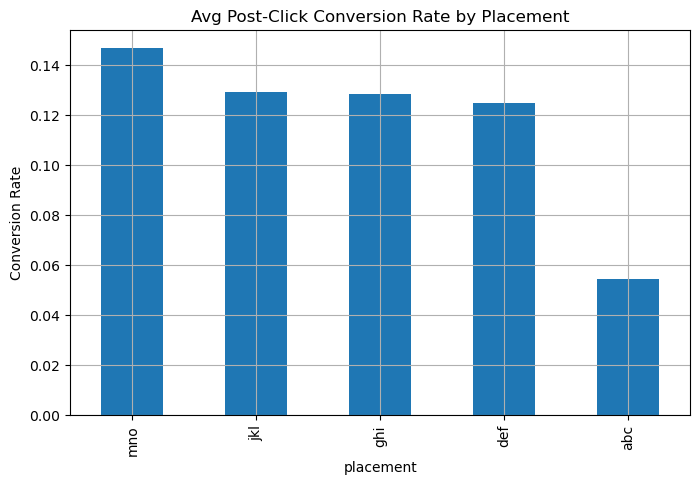

In [10]:
#Q9
# Conversion rate already computed earlier; reuse or recompute


placement_conv = df.groupby('placement')['conversion_rate'].mean().sort_values(ascending=False)
print(placement_conv)

# Optional plot
placement_conv.plot(kind='bar', figsize=(8, 5), title='Avg Post-Click Conversion Rate by Placement')
plt.ylabel('Conversion Rate')
plt.grid(True)
plt.show()


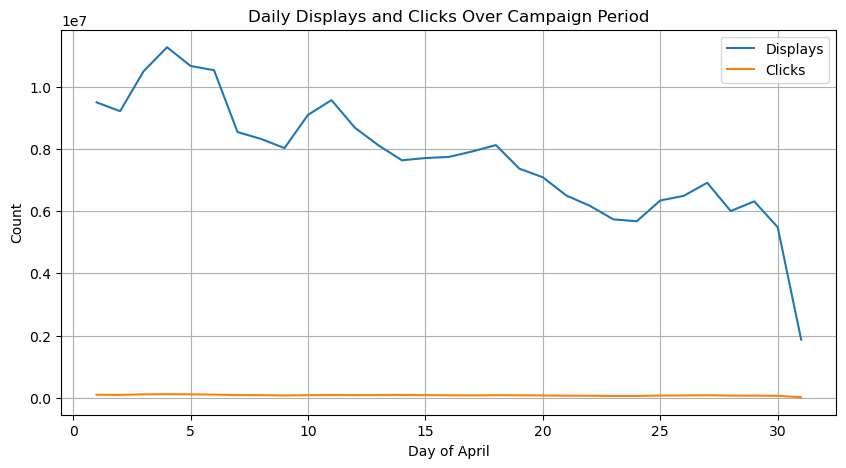

In [11]:
#Q10
# Aggregate by day
daily_stats = df.groupby('day')[['displays', 'clicks']].sum().reset_index()

# Plot both metrics
plt.figure(figsize=(10, 5))
sns.lineplot(data=daily_stats, x='day', y='displays', label='Displays')
sns.lineplot(data=daily_stats, x='day', y='clicks', label='Clicks')
plt.title('Daily Displays and Clicks Over Campaign Period')
plt.xlabel('Day of April')
plt.ylabel('Count')
plt.grid(True)
plt.legend()
plt.show()

In [12]:
#Q11
# Map user engagement to ordinal values
engagement_map = {'Low': 1, 'Medium': 2, 'High': 3}
df['user_engagement_score'] = df['user_engagement'].map(engagement_map)

# Correlation
corr = df['user_engagement_score'].corr(df['revenue'])
print(f"Correlation between user engagement level and revenue: {corr:.2f}")


Correlation between user engagement level and revenue: 0.18


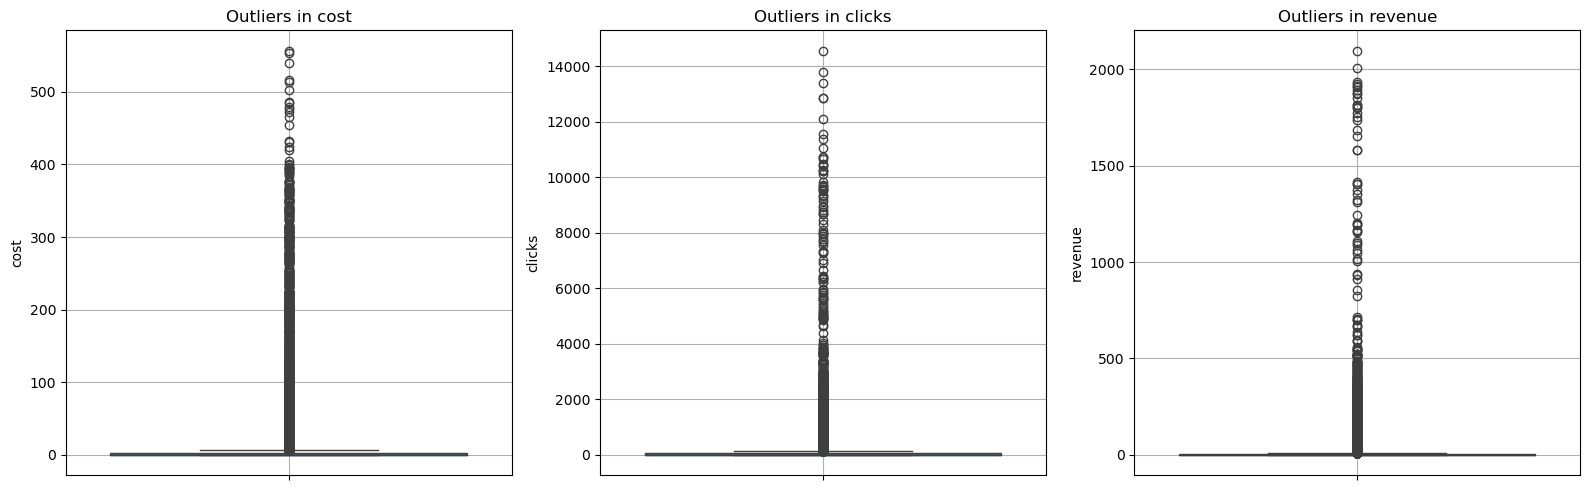

In [13]:
#Q12
plt.figure(figsize=(16, 5))

for i, col in enumerate(['cost', 'clicks', 'revenue']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df[col])
    plt.title(f'Outliers in {col}')
    plt.grid(True)

plt.tight_layout()
plt.show()


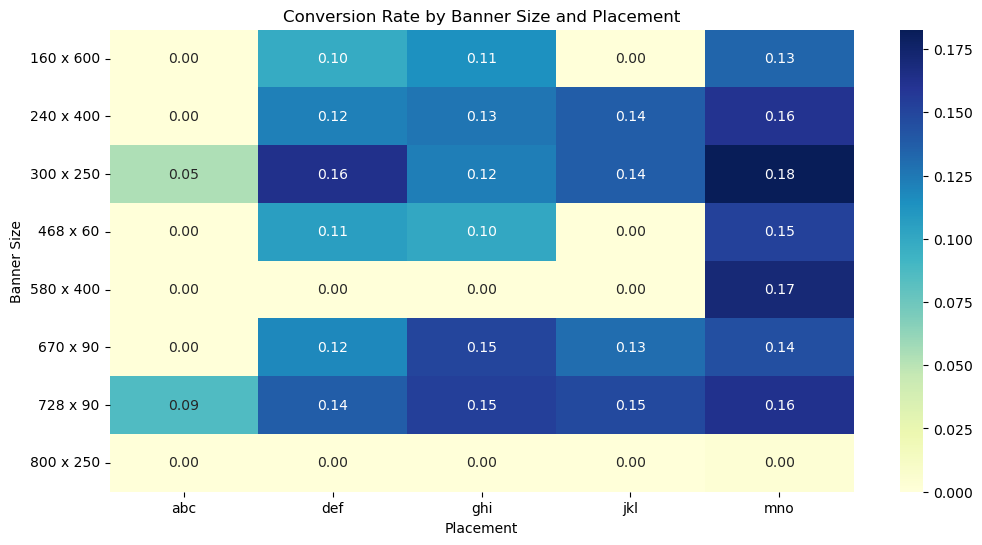

In [14]:
#Q13
# Average conversion rate by banner and placement
effectiveness = df.groupby(['banner', 'placement'])['conversion_rate'].mean().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(effectiveness, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Conversion Rate by Banner Size and Placement')
plt.xlabel('Placement')
plt.ylabel('Banner Size')
plt.show()

In [15]:
#Q14
# Compute ROI
df['roi'] = df.apply(lambda row: row['revenue'] / row['cost'] if row['cost'] > 0 else 0, axis=1)

# Group by campaign and banner
roi_stats = df.groupby(['campaign_number', 'banner'])['roi'].mean().sort_values(ascending=False)
print(roi_stats.head(10))


campaign_number  banner   
camp 3           160 x 600    4.070796
camp 1           160 x 600    3.922093
camp 2           580 x 400    3.113678
camp 3           580 x 400    3.004255
camp 1           240 x 400    2.531187
                 300 x 250    2.171725
                 580 x 400    2.070334
camp 2           240 x 400    1.906611
                 670 x 90     1.851741
camp 3           670 x 90     1.803126
Name: roi, dtype: float64


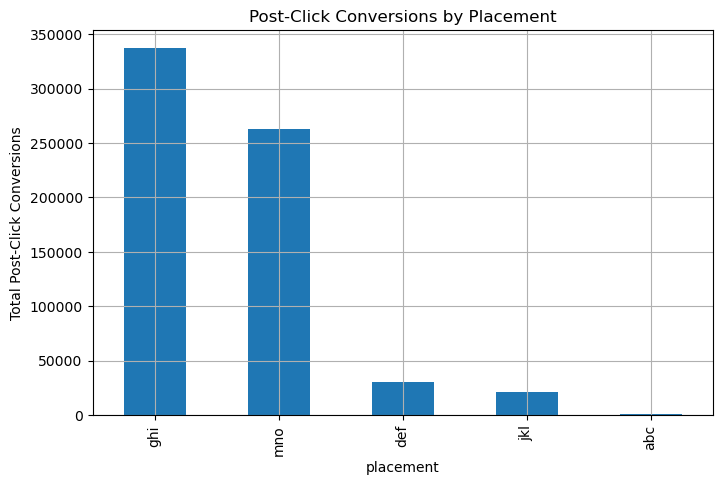

In [16]:
#Q15
placement_postclick = df.groupby('placement')['post_click_conversions'].sum().sort_values(ascending=False)

# Bar chart
placement_postclick.plot(kind='bar', figsize=(8, 5), title='Post-Click Conversions by Placement')
plt.ylabel('Total Post-Click Conversions')
plt.grid(True)
plt.show()


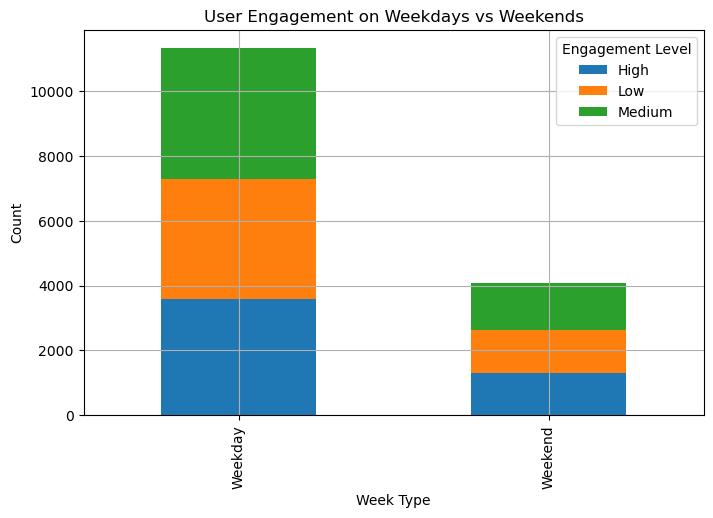

In [17]:
#Q16
# Assign weekdays (1=Monday, 7=Sunday)
df['weekday'] = ((df['day'] - 1) % 7) + 1
df['week_type'] = df['weekday'].apply(lambda x: 'Weekend' if x in [6, 7] else 'Weekday')

# Count of user engagement levels
engagement_weektype = df.groupby(['week_type', 'user_engagement']).size().unstack().fillna(0)

# Plot
engagement_weektype.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('User Engagement on Weekdays vs Weekends')
plt.xlabel('Week Type')
plt.ylabel('Count')
plt.legend(title='Engagement Level')
plt.grid(True)
plt.show()


In [18]:
#Q17
# Compute CPC
df['cpc'] = df.apply(lambda row: row['cost'] / row['clicks'] if row['clicks'] > 0 else 0, axis=1)

# Group by campaign and banner
cpc_summary = df.groupby(['campaign_number', 'banner'])['cpc'].mean().sort_values()
print(cpc_summary.head(10))


campaign_number  banner   
camp 3           800 x 250    0.000009
camp 2           800 x 250    0.000583
camp 1           800 x 250    0.000626
camp 3           468 x 60     0.001458
camp 2           580 x 400    0.013092
                 468 x 60     0.013486
                 300 x 250    0.023250
                 240 x 400    0.023859
                 728 x 90     0.024117
camp 3           670 x 90     0.029571
Name: cpc, dtype: float64


In [19]:
#Q18
df['cost_per_conversion'] = df.apply(lambda row: row['cost'] / row['post_click_conversions'] if row['post_click_conversions'] > 0 else np.nan, axis=1)

# Average cost per conversion by campaign and placement
cost_efficiency = df.groupby(['campaign_number', 'placement'])['cost_per_conversion'].mean().sort_values()
print(cost_efficiency.head(10))


campaign_number  placement
camp 1           abc          0.163195
                 jkl          0.263877
camp 3           abc          0.317597
camp 1           ghi          0.325304
                 mno          0.474666
                 def          0.576989
camp 3           def          0.873166
                 jkl          0.976729
camp 2           jkl          1.140003
                 mno          1.552726
Name: cost_per_conversion, dtype: float64


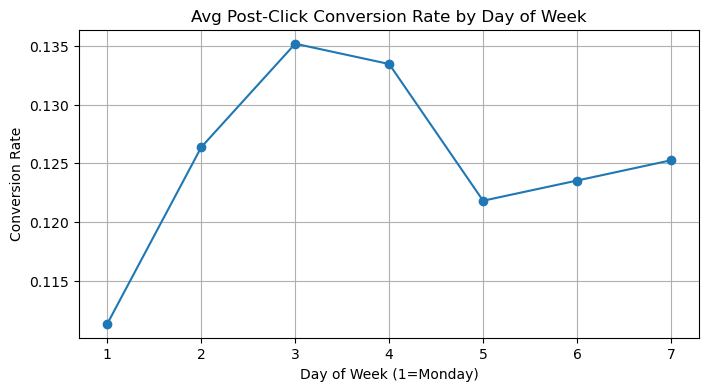

In [20]:
#Q19
# Reuse weekday column
weekday_conversion = df.groupby('weekday')['conversion_rate'].mean()

# Plot
weekday_conversion.plot(kind='line', marker='o', figsize=(8, 4))
plt.title('Avg Post-Click Conversion Rate by Day of Week')
plt.xlabel('Day of Week (1=Monday)')
plt.ylabel('Conversion Rate')
plt.grid(True)
plt.show()


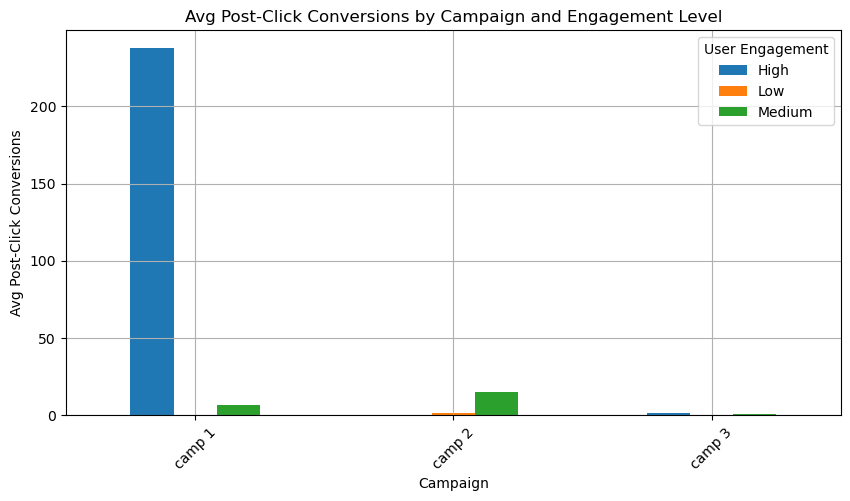

In [21]:
#Q20
conversion_engagement = df.groupby(['campaign_number', 'user_engagement'])['post_click_conversions'].mean().unstack().fillna(0)

# Plot
conversion_engagement.plot(kind='bar', figsize=(10, 5))
plt.title('Avg Post-Click Conversions by Campaign and Engagement Level')
plt.ylabel('Avg Post-Click Conversions')
plt.xlabel('Campaign')
plt.grid(True)
plt.legend(title='User Engagement')
plt.xticks(rotation=45)
plt.show()
